In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [2]:
df=pd.read_csv(r"C:\Users\manasbhatnagar\Downloads\datasets_4458_8204_winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# EDA

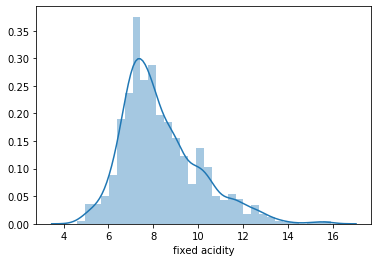

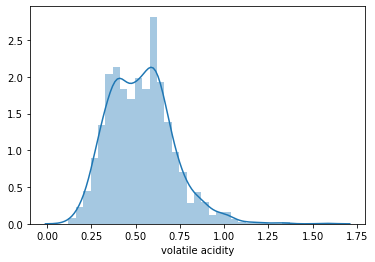

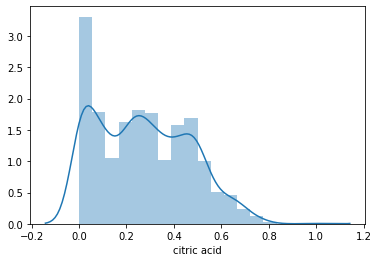

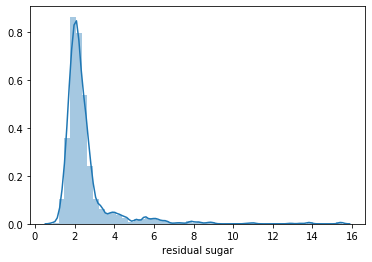

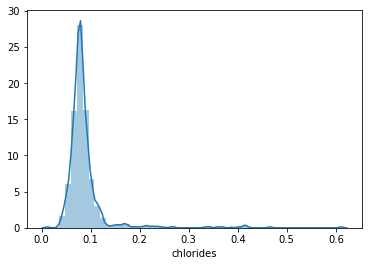

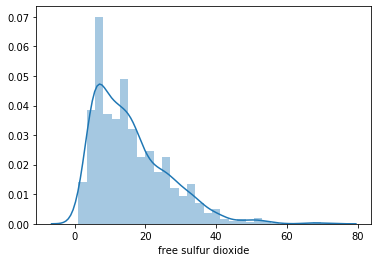

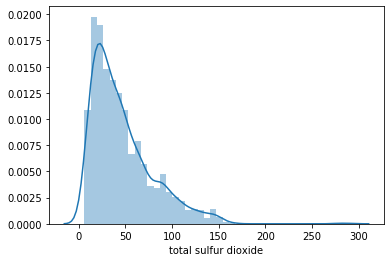

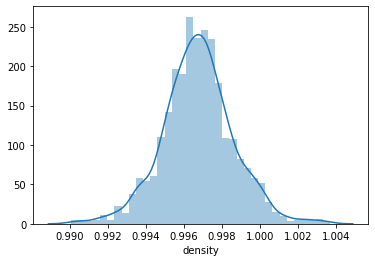

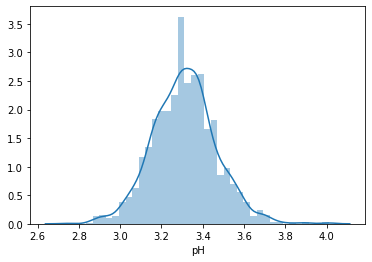

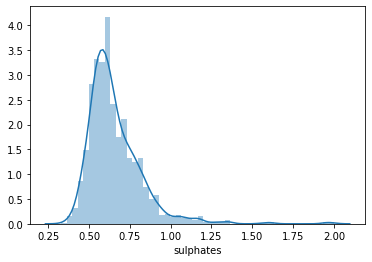

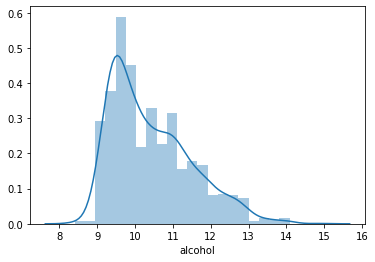

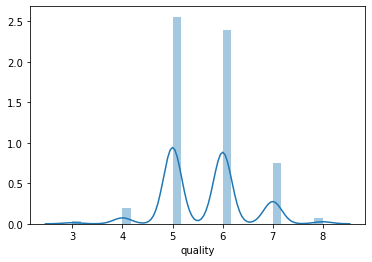

In [4]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sb.distplot(df[col])

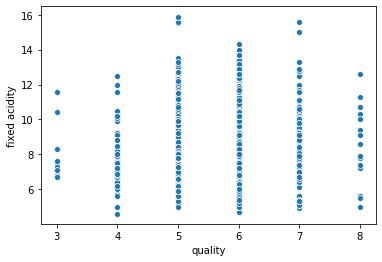

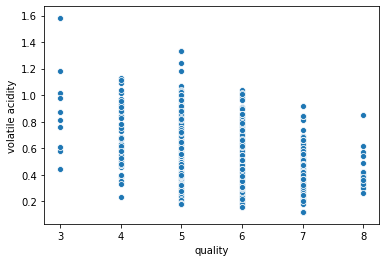

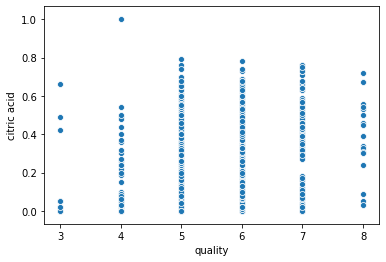

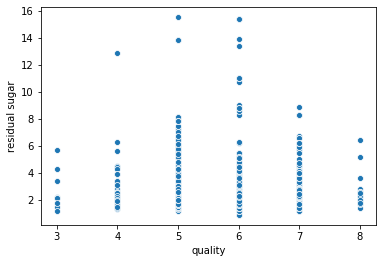

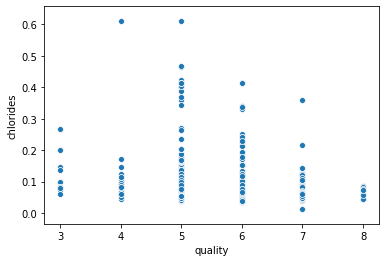

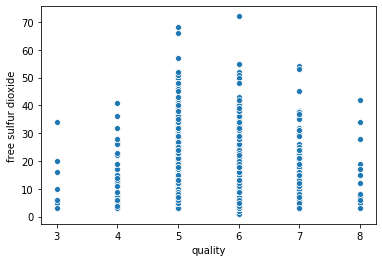

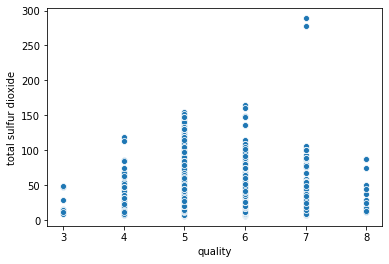

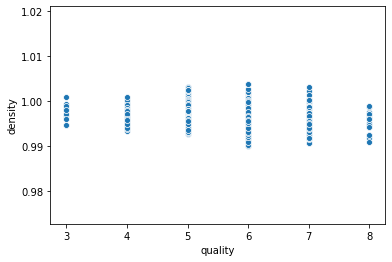

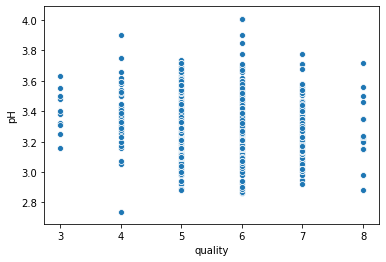

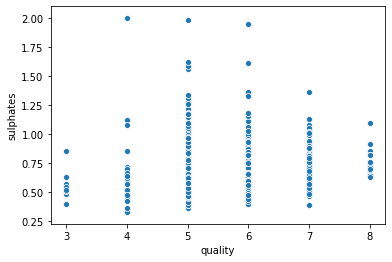

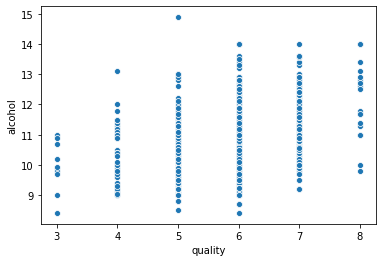

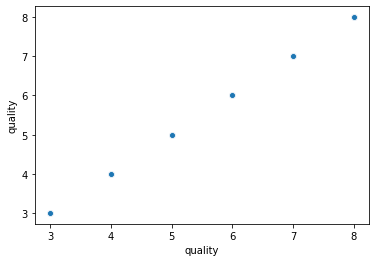

In [5]:
for i, col in enumerate(df.columns):
    plt.figure(i)
    sb.scatterplot(x=df["quality"],y=df[col])

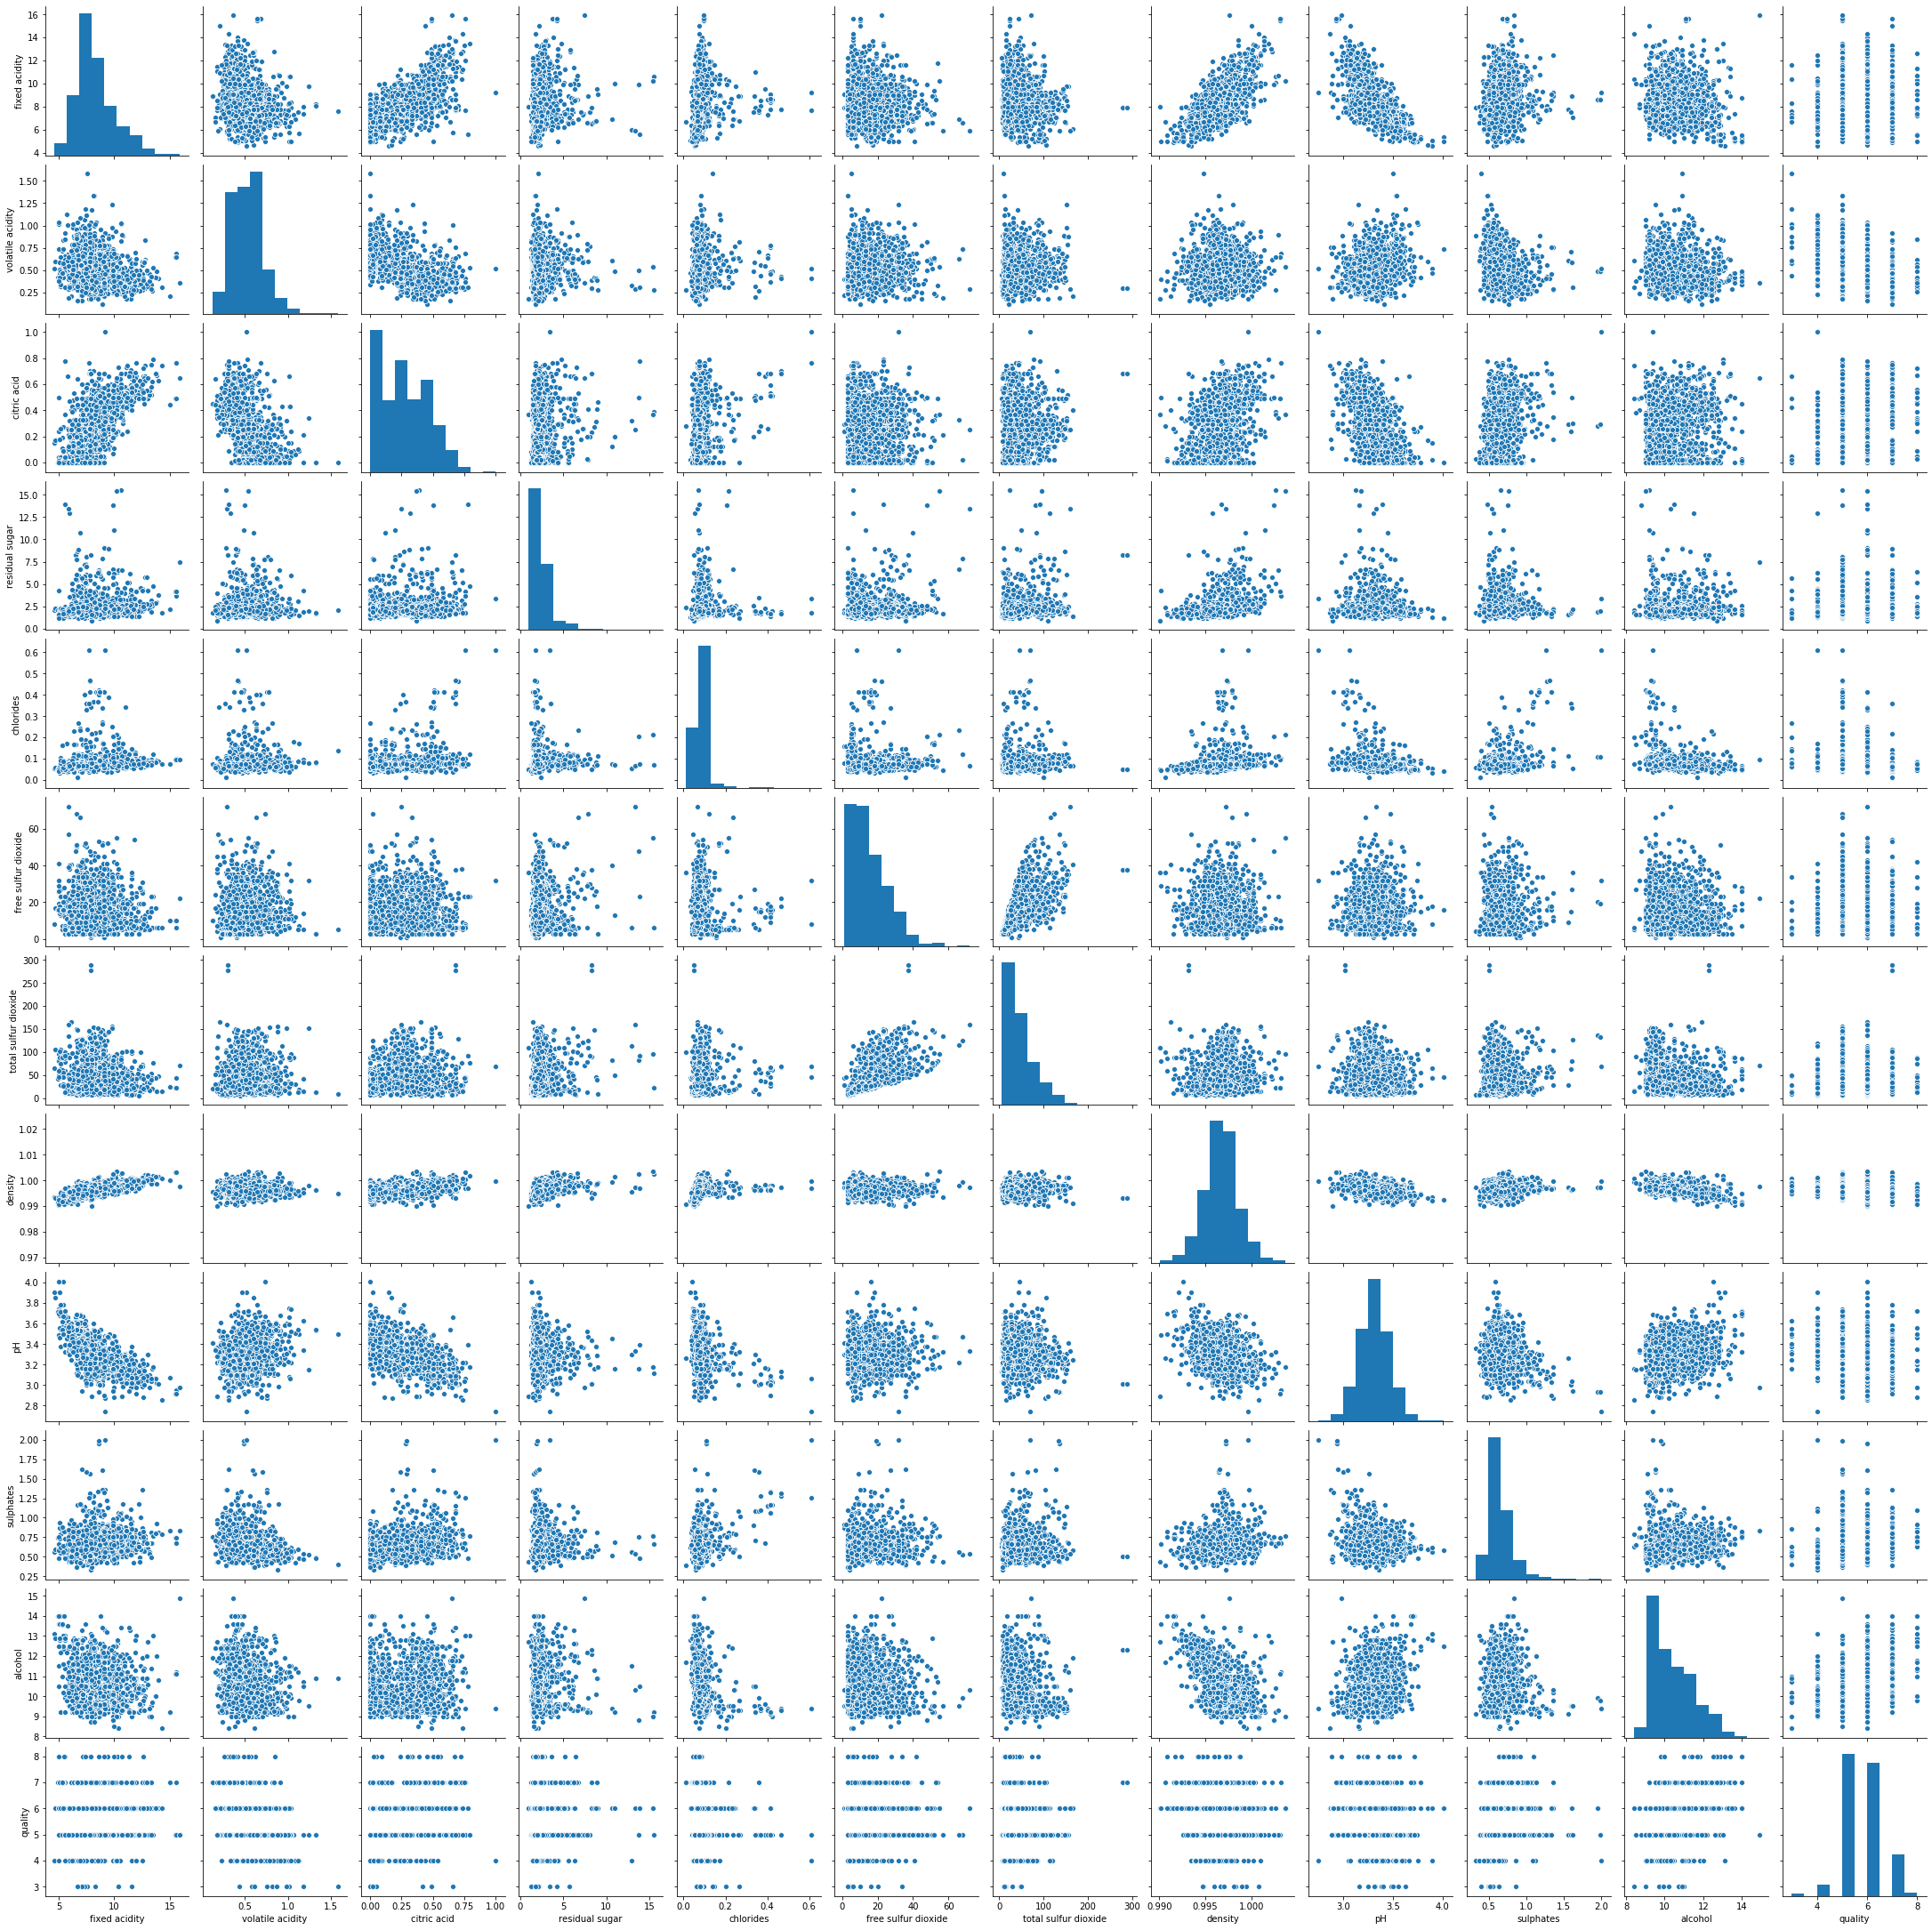

In [6]:
sb.pairplot(df)

# Feature Engineering

# 1) Treating Missing Values

In [7]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# 2) Treating Outliers

In [8]:
fa_mean=df["fixed acidity"].mean()
fa_std=df["fixed acidity"].std()
va_mean=df["volatile acidity"].mean()
va_std=df["volatile acidity"].std()
ca_mean=df["citric acid"].mean()
ca_std=df["citric acid"].std()
rs_mean=df["residual sugar"].mean()
rs_std=df["residual sugar"].std()
c_mean=df["chlorides"].mean()
c_std=df["chlorides"].std()
fsd_mean=df["free sulfur dioxide"].mean()
fsd_std=df["free sulfur dioxide"].std()
tsd_mean=df["total sulfur dioxide"].mean()
tsd_std=df["total sulfur dioxide"].std()
d_mean=df["density"].mean()
d_std=df["density"].std()
ph_mean=df["pH"].mean()
ph_std=df["pH"].std()
s_mean=df["sulphates"].mean()
s_std=df["sulphates"].std()
a_mean=df["alcohol"].mean()
a_std=df["alcohol"].std()

In [9]:
df.loc[(df["fixed acidity"] >(fa_mean -(3 * fa_std))) | (df["fixed acidity"] <(fa_mean +(3 * fa_std)))]
df.loc[(df["volatile acidity"] >(va_mean -(3 * va_std))) | (df["volatile acidity"] <(va_mean +(3 * va_std)))] 
df.loc[(df["citric acid"] >(ca_mean -(3 * ca_std))) | (df["citric acid"] <(ca_mean +(3 * ca_std)))]
df.loc[(df["residual sugar"] >(rs_mean -(3 * rs_std))) | (df["residual sugar"] <(rs_mean +(3 * rs_std)))]
df.loc[(df["chlorides"] >(c_mean -(3 * c_std))) | (df["chlorides"] <(c_mean +(3 * c_std)))]
df.loc[(df["free sulfur dioxide"] >(fsd_mean -(3 * fsd_std))) | (df["free sulfur dioxide"] <(fsd_mean +(3 * fsd_std)))] 
df.loc[(df["total sulfur dioxide"] >(tsd_mean -(3 * tsd_std))) | (df["total sulfur dioxide"] <(tsd_mean +(3 * tsd_std)))] 
df.loc[(df["density"] >(d_mean -(3 * d_std))) | (df["density"] <(d_mean +(3 * d_std)))]
df.loc[(df["alcohol"] >(a_mean -(3 * a_std))) | (df["alcohol"] <(a_mean +(3 * a_std)))] 
df.loc[(df["sulphates"] >(s_mean -(3 * s_std))) | (df["sulphates"] <(s_mean +(3 * s_std)))] 
df.loc[(df["pH"] >(ph_mean -(3 * ph_std))) | (df["pH"] <(ph_mean +(3 * ph_std)))]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# 3) Variable Transformation

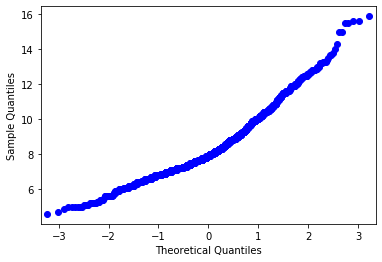

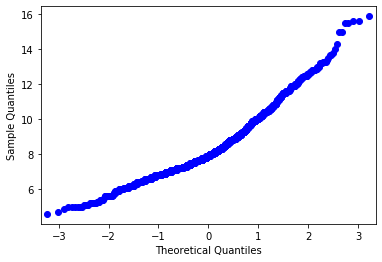

In [10]:
sm.qqplot(df["fixed acidity"])

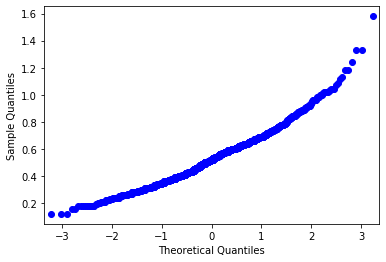

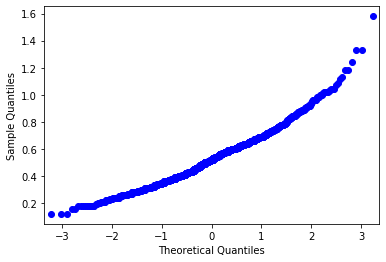

In [11]:
sm.qqplot(df["volatile acidity"])

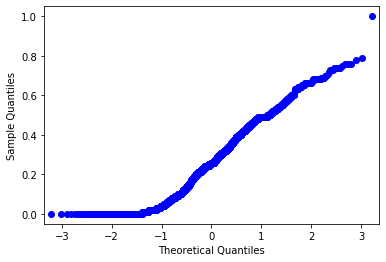

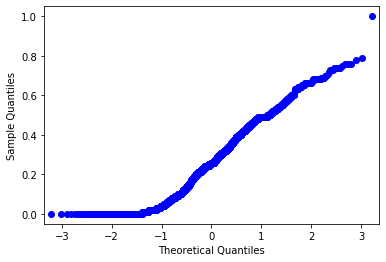

In [12]:
sm.qqplot(df["citric acid"])

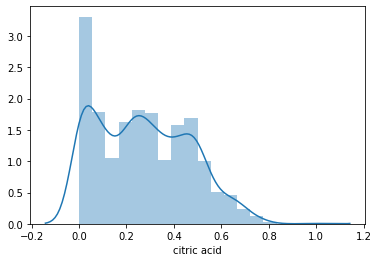

In [13]:
sb.distplot(df["citric acid"])

In [14]:
df["citric_acid_sqrt"]=df["citric acid"]**(1/2)

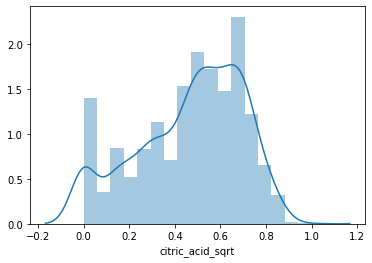

In [15]:
sb.distplot(df["citric_acid_sqrt"])

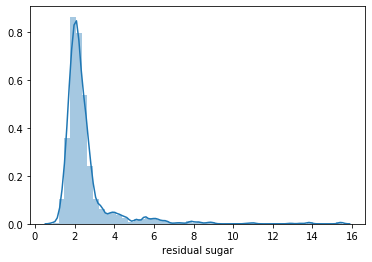

In [16]:
sb.distplot(df["residual sugar"])

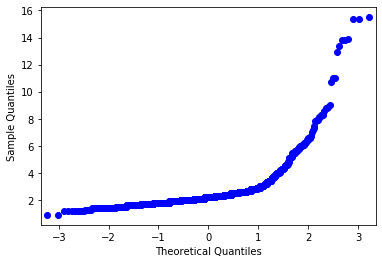

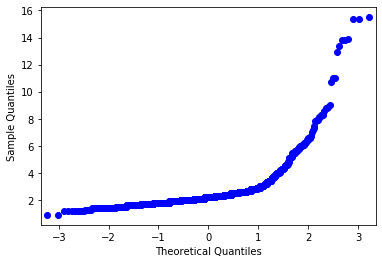

In [17]:
sm.qqplot(df["residual sugar"])

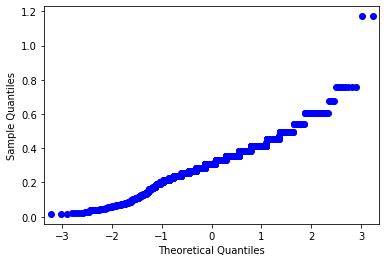

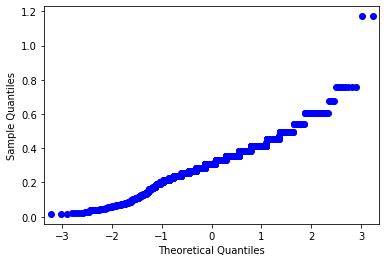

In [18]:
df["residual_sugar_inverse"]=1/df["residual sugar"]**(3/2)
sm.qqplot(df["residual_sugar_inverse"])

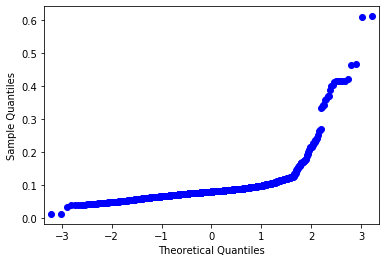

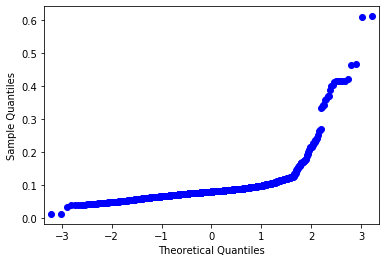

In [19]:
sm.qqplot(df["chlorides"])

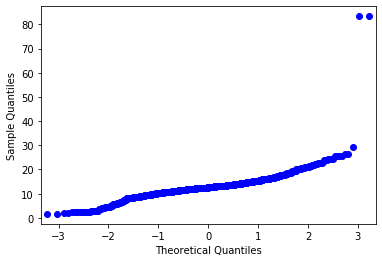

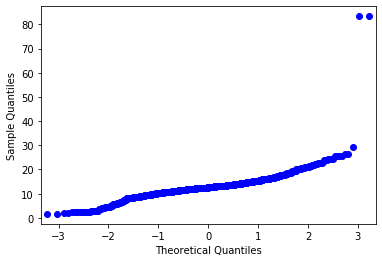

In [20]:
df["chlorides_inverse"]=1/df["chlorides"]
sm.qqplot(df["chlorides_inverse"])

In [21]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'citric_acid_sqrt',
       'residual_sugar_inverse', 'chlorides_inverse'],
      dtype='object')

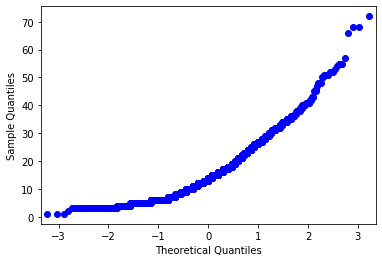

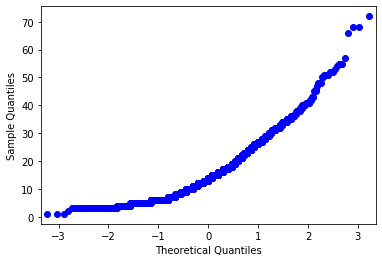

In [22]:
sm.qqplot(df["free sulfur dioxide"])

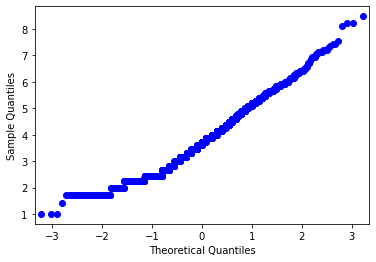

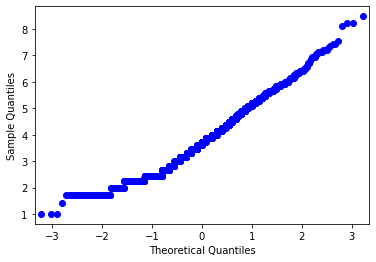

In [23]:
df["free_sulfur_dioxide_sqrt"]=df["free sulfur dioxide"]**(1/2)
sm.qqplot(df["free_sulfur_dioxide_sqrt"])

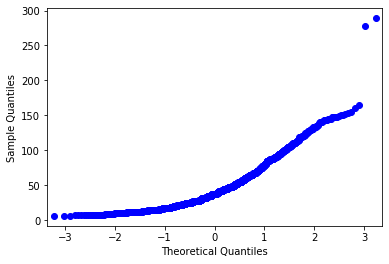

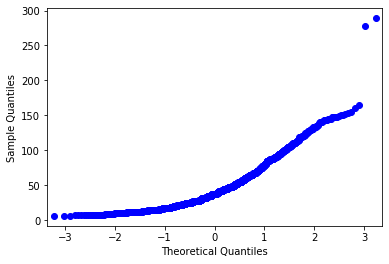

In [24]:
sm.qqplot(df["total sulfur dioxide"])

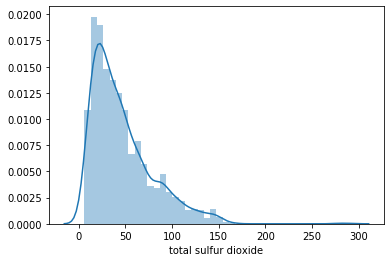

In [25]:
sb.distplot(df["total sulfur dioxide"])

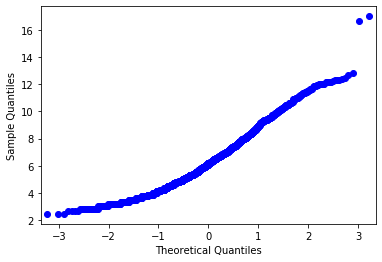

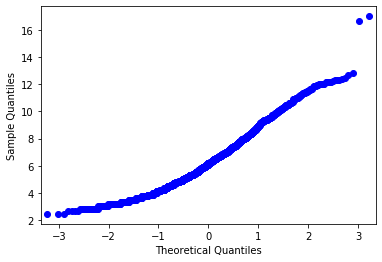

In [26]:
df["total_sulfur_dioxide_sqrt"]=df["total sulfur dioxide"]**(1/2)
sm.qqplot(df["total_sulfur_dioxide_sqrt"])

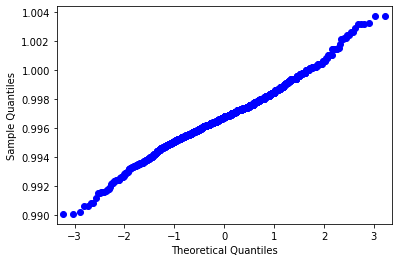

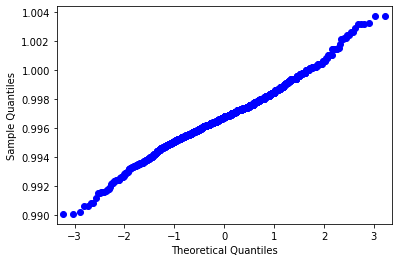

In [27]:
sm.qqplot(df["density"])

In [28]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'citric_acid_sqrt',
       'residual_sugar_inverse', 'chlorides_inverse',
       'free_sulfur_dioxide_sqrt', 'total_sulfur_dioxide_sqrt'],
      dtype='object')

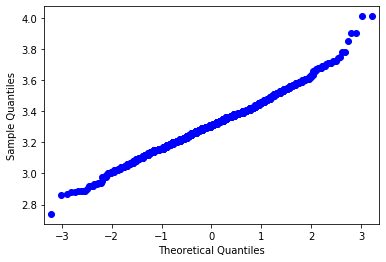

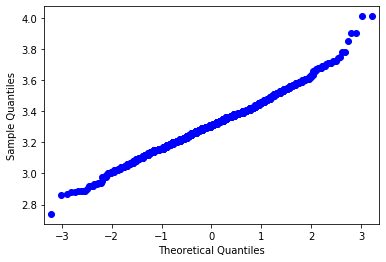

In [29]:
sm.qqplot(df["pH"])

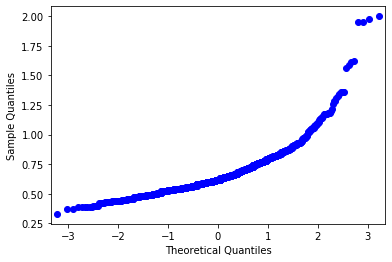

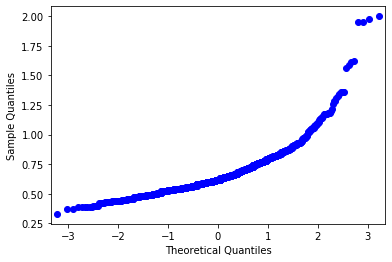

In [30]:
sm.qqplot(df["sulphates"])

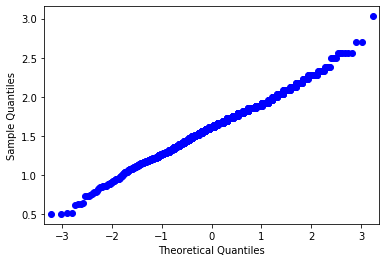

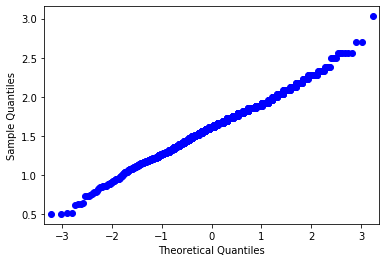

In [31]:
df["sulphates_inverse"]=1/df["sulphates"]
sm.qqplot(df["sulphates_inverse"])

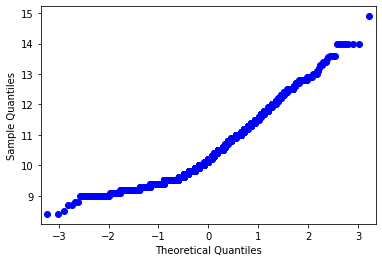

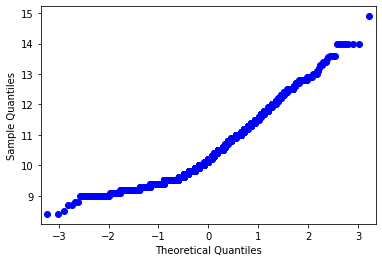

In [32]:
sm.qqplot(df["alcohol"])

In [33]:
df1=df.drop(columns=["citric acid","residual sugar","chlorides",'free sulfur dioxide', 'total sulfur dioxide',"sulphates"])

In [34]:
df1.columns

Index(['fixed acidity', 'volatile acidity', 'density', 'pH', 'alcohol',
       'quality', 'citric_acid_sqrt', 'residual_sugar_inverse',
       'chlorides_inverse', 'free_sulfur_dioxide_sqrt',
       'total_sulfur_dioxide_sqrt', 'sulphates_inverse'],
      dtype='object')

In [35]:
df1.head()

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,7.4,0.70,0.9978,3.51,9.4,5,0.000000,0.381830,13.157895,3.316625,5.830952,1.785714
1,7.8,0.88,0.9968,3.20,9.8,5,0.000000,0.238528,10.204082,5.000000,8.185353,1.470588
2,7.8,0.76,0.9970,3.26,9.8,5,0.200000,0.286687,10.869565,3.872983,7.348469,1.538462
3,11.2,0.28,0.9980,3.16,9.8,6,0.748331,0.381830,13.333333,4.123106,7.745967,1.724138
4,7.4,0.70,0.9978,3.51,9.4,5,0.000000,0.381830,13.157895,3.316625,5.830952,1.785714


# 4) Min Max Scaling

In [36]:
from sklearn import preprocessing
mms=preprocessing.MinMaxScaler()

In [37]:
df1[['fixed acidity', 'volatile acidity', 'density', 'pH', 'alcohol', 'citric_acid_sqrt', 'residual_sugar_inverse','chlorides_inverse', 'free_sulfur_dioxide_sqrt','total_sulfur_dioxide_sqrt', 'sulphates_inverse']]=mms.fit_transform(df1[['fixed acidity', 'volatile acidity', 'density', 'pH', 'alcohol', 'citric_acid_sqrt', 'residual_sugar_inverse','chlorides_inverse', 'free_sulfur_dioxide_sqrt','total_sulfur_dioxide_sqrt', 'sulphates_inverse']])

In [38]:
df1.head()

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.247788,0.397260,0.567548,0.606299,0.153846,5,0.000000,0.316448,0.141025,0.309491,0.232395,0.508127
1,0.283186,0.520548,0.494126,0.362205,0.215385,5,0.000000,0.192359,0.104869,0.534382,0.394204,0.383586
2,0.283186,0.438356,0.508811,0.409449,0.215385,5,0.200000,0.234061,0.113014,0.383818,0.336688,0.410410
3,0.584071,0.109589,0.582232,0.330709,0.215385,6,0.748331,0.316448,0.143172,0.417233,0.364006,0.483791
4,0.247788,0.397260,0.567548,0.606299,0.153846,5,0.000000,0.316448,0.141025,0.309491,0.232395,0.508127


# 5) Balancing Imbalanced Dataset

In [39]:
df1.groupby("quality").agg({"alcohol":"count"})

,alcohol
quality,
3,10
4,53
5,681
6,638
7,199
8,18


In [40]:
x=df1.loc[df1.quality==3]
x

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
459,0.619469,0.315068,0.787812,0.401575,0.092308,3,0.812404,0.251178,0.145377,0.288871,0.302819,0.495745
517,0.513274,0.335616,0.685022,0.330709,0.000000,3,0.700000,0.270357,0.041169,0.165133,0.106561,0.429712
690,0.247788,0.729452,0.479442,0.700787,0.353846,3,0.000000,0.084642,0.106156,0.165133,0.088806,0.534265
832,0.513274,0.219178,0.605727,0.503937,0.230769,3,0.648074,0.457163,0.064383,0.645393,0.307805,0.261941
899,0.327434,0.616438,0.649780,0.582677,0.400000,3,0.141421,0.123932,0.125686,0.193645,0.059595,0.608945
1299,0.265487,1.000000,0.344347,0.598425,0.384615,3,0.000000,0.270357,0.069313,0.165133,0.037834,0.790419
1374,0.194690,0.476027,0.340675,0.456693,0.215385,3,0.000000,0.644546,0.025811,0.400787,0.201758,0.577316
1469,0.238938,0.589041,0.512482,0.448819,0.200000,3,0.223607,0.270357,0.180629,0.463862,0.312739,0.520958
1478,0.221239,0.517123,0.588106,0.519685,0.276923,3,0.223607,0.049441,0.129240,0.097799,0.088806,0.562414
1505,0.185841,0.438356,0.435389,0.637795,0.238462,3,0.141421,0.344380,0.136895,0.193645,0.069730,0.429712


In [42]:
x=pd.concat([x]*60, ignore_index=True)
x

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.619469,0.315068,0.787812,0.401575,0.092308,3,0.812404,0.251178,0.145377,0.288871,0.302819,0.495745
1,0.513274,0.335616,0.685022,0.330709,0.000000,3,0.700000,0.270357,0.041169,0.165133,0.106561,0.429712
2,0.247788,0.729452,0.479442,0.700787,0.353846,3,0.000000,0.084642,0.106156,0.165133,0.088806,0.534265
3,0.513274,0.219178,0.605727,0.503937,0.230769,3,0.648074,0.457163,0.064383,0.645393,0.307805,0.261941
4,0.327434,0.616438,0.649780,0.582677,0.400000,3,0.141421,0.123932,0.125686,0.193645,0.059595,0.608945
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0.265487,1.000000,0.344347,0.598425,0.384615,3,0.000000,0.270357,0.069313,0.165133,0.037834,0.790419
596,0.194690,0.476027,0.340675,0.456693,0.215385,3,0.000000,0.644546,0.025811,0.400787,0.201758,0.577316
597,0.238938,0.589041,0.512482,0.448819,0.200000,3,0.223607,0.270357,0.180629,0.463862,0.312739,0.520958
598,0.221239,0.517123,0.588106,0.519685,0.276923,3,0.223607,0.049441,0.129240,0.097799,0.088806,0.562414


In [43]:
y=df1.loc[df1.quality==4]
y=pd.concat([y]*12,ignore_index=True)
y

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.247788,0.321918,0.538179,0.503937,0.092308,4,0.282843,0.079632,0.122297,0.193645,0.201758,0.592814
1,0.097345,0.691781,0.288546,0.598425,0.215385,4,0.300000,0.457163,0.051132,0.219865,0.131226,0.625749
2,0.371681,0.335616,0.552863,0.409449,0.138462,4,0.547723,0.170629,0.119062,0.417233,0.297779,0.577316
3,0.000000,0.273973,0.244493,0.913386,0.723077,4,0.387298,0.270357,0.206641,0.244270,0.385744,0.508127
4,0.327434,0.380137,0.552863,0.448819,0.123077,4,0.509902,0.270357,0.125686,0.309491,0.282323,0.548074
...,...,...,...,...,...,...,...,...,...,...,...,...
631,0.185841,0.630137,0.470631,0.614173,0.400000,4,0.282843,0.234061,0.162659,0.448734,0.220430,0.495745
632,0.088496,0.342466,0.360499,0.724409,0.261538,4,0.173205,0.457163,0.132972,0.193645,0.079452,0.439830
633,0.230088,0.315068,0.522761,0.464567,0.292308,4,0.734847,0.270357,0.087339,0.097799,0.037834,0.495745
634,0.194690,0.541096,0.429515,0.622047,0.384615,4,0.244949,0.291963,0.183973,0.133596,0.059595,0.419910


In [44]:
z=df1.loc[df1.quality==7]
z=pd.concat([z]*3,ignore_index=True)
z

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.238938,0.363014,0.332599,0.511811,0.246154,7,0.000000,0.644546,0.168280,0.383818,0.146599,0.643267
1,0.283186,0.315068,0.494126,0.488189,0.169231,7,0.141421,0.291963,0.147643,0.267191,0.123236,0.495745
2,0.345133,0.109589,0.501468,0.440945,0.323077,7,0.748331,0.344380,0.113014,0.656766,0.529150,0.329341
3,0.309735,0.178082,0.494126,0.385827,0.200000,7,0.529150,0.270357,0.165427,0.348090,0.208085,0.343778
4,0.256637,0.273973,0.494126,0.503937,0.169231,7,0.400000,0.316448,0.123971,0.329193,0.238245,0.439830
...,...,...,...,...,...,...,...,...,...,...,...,...
592,0.176991,0.301370,0.286344,0.535433,0.507692,7,0.374166,0.218708,0.171223,0.348090,0.201758,0.439830
593,0.247788,0.089041,0.483847,0.519685,0.384615,7,0.538516,0.251178,0.206641,0.448734,0.312739,0.322408
594,0.336283,0.171233,0.398678,0.338583,0.430769,7,0.655744,0.234061,0.174259,0.329193,0.131226,0.290308
595,0.212389,0.301370,0.372247,0.551181,0.330769,7,0.412311,0.376480,0.168280,0.383818,0.168344,0.383586


In [45]:
a=df1.loc[df1.quality==8]
a=pd.concat([a]*30,ignore_index=True)
a

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.292035,0.157534,0.530837,0.480315,0.676923,8,0.678233,0.112584,0.136895,0.383818,0.249701,0.261941
1,0.504425,0.136986,0.552863,0.385827,0.646154,8,0.670820,0.039293,0.147643,0.165133,0.079452,0.284358
2,0.088496,0.500000,0.171072,0.645669,0.692308,8,0.223607,0.508556,0.251976,0.329193,0.476364,0.284358
3,0.707965,0.130137,0.633627,0.110236,0.215385,8,0.848528,0.251178,0.149972,0.193645,0.201758,0.284358
4,0.592920,0.342466,0.640969,0.377953,0.769231,8,0.818535,0.058836,0.122297,0.193645,0.131226,0.375163
...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.353982,0.205479,0.373715,0.480315,0.507692,8,0.624500,0.344380,0.159973,0.193645,0.069730,0.375163
536,0.079646,0.253425,0.053598,0.598425,0.861538,8,0.173205,0.344380,0.258158,0.573325,0.472691,0.284358
537,0.230088,0.143836,0.435389,0.385827,0.246154,8,0.574456,0.376480,0.180629,0.097799,0.079452,0.161677
538,0.230088,0.178082,0.341410,0.385827,0.446154,8,0.556776,0.291963,0.198545,0.383818,0.201758,0.322408


In [46]:
df2=pd.concat([df1,x,y,z,a],axis=0)
df2

,fixed acidity,volatile acidity,density,pH,alcohol,quality,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
0,0.247788,0.397260,0.567548,0.606299,0.153846,5,0.000000,0.316448,0.141025,0.309491,0.232395,0.508127
1,0.283186,0.520548,0.494126,0.362205,0.215385,5,0.000000,0.192359,0.104869,0.534382,0.394204,0.383586
2,0.283186,0.438356,0.508811,0.409449,0.215385,5,0.200000,0.234061,0.113014,0.383818,0.336688,0.410410
3,0.584071,0.109589,0.582232,0.330709,0.215385,6,0.748331,0.316448,0.143172,0.417233,0.364006,0.483791
4,0.247788,0.397260,0.567548,0.606299,0.153846,5,0.000000,0.316448,0.141025,0.309491,0.232395,0.508127
...,...,...,...,...,...,...,...,...,...,...,...,...
535,0.353982,0.205479,0.373715,0.480315,0.507692,8,0.624500,0.344380,0.159973,0.193645,0.069730,0.375163
536,0.079646,0.253425,0.053598,0.598425,0.861538,8,0.173205,0.344380,0.258158,0.573325,0.472691,0.284358
537,0.230088,0.143836,0.435389,0.385827,0.246154,8,0.574456,0.376480,0.180629,0.097799,0.079452,0.161677
538,0.230088,0.178082,0.341410,0.385827,0.446154,8,0.556776,0.291963,0.198545,0.383818,0.201758,0.322408


# Feature Selection (Anova Test)

In [47]:
from scipy.stats import f_oneway

In [48]:
for i in df2.columns:
    print(i,",","quality","-",f_oneway(df2[i],df2["quality"]))

fixed acidity , quality - F_onewayResult(statistic=38066.43748886885, pvalue=0.0)
volatile acidity , quality - F_onewayResult(statistic=38297.89906037733, pvalue=0.0)
density , quality - F_onewayResult(statistic=36062.18511044216, pvalue=0.0)
pH , quality - F_onewayResult(statistic=36296.99340644223, pvalue=0.0)
alcohol , quality - F_onewayResult(statistic=37595.02700444293, pvalue=0.0)
quality , quality - F_onewayResult(statistic=-5.653362707120127e-29, pvalue=nan)
citric_acid_sqrt , quality - F_onewayResult(statistic=35784.464998523996, pvalue=0.0)
residual_sugar_inverse , quality - F_onewayResult(statistic=39330.317525715334, pvalue=0.0)
chlorides_inverse , quality - F_onewayResult(statistic=41293.823854724, pvalue=0.0)
free_sulfur_dioxide_sqrt , quality - F_onewayResult(statistic=37987.15344082251, pvalue=0.0)
total_sulfur_dioxide_sqrt , quality - F_onewayResult(statistic=39662.771404457824, pvalue=0.0)
sulphates_inverse , quality - F_onewayResult(statistic=36658.87419221755, pvalu

# Spliting Training & Testing Data

In [49]:
x=df2.drop(columns=["quality"])
y=df2.loc[:,"quality"]

In [50]:
from sklearn.model_selection import train_test_split as tts

In [51]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.3,random_state=0)

In [52]:
x_train

,fixed acidity,volatile acidity,density,pH,alcohol,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
431,0.610619,0.287671,0.611601,0.212598,0.523077,0.842615,0.079632,0.078680,0.193645,0.097831,0.278551
601,0.761062,0.232877,0.773128,0.283465,0.092308,0.721110,0.251178,0.152367,0.329193,0.238245,0.508127
514,0.371681,0.143836,0.477974,0.440945,0.569231,0.640312,0.046233,0.147643,0.219865,0.079452,0.439830
98,0.265487,0.534247,0.486784,0.511811,0.215385,0.244949,0.204875,0.134908,0.165133,0.048987,0.508127
1,0.097345,0.691781,0.288546,0.598425,0.215385,0.300000,0.457163,0.051132,0.219865,0.131226,0.625749
...,...,...,...,...,...,...,...,...,...,...,...
835,0.265487,0.373288,0.475771,0.511811,0.138462,0.316228,0.457163,0.165427,0.560587,0.341343,0.577316
429,0.725664,0.339041,0.890602,0.259843,0.246154,0.812404,0.047803,0.127441,0.219865,0.277052,0.343778
54,0.327434,0.616438,0.649780,0.582677,0.400000,0.141421,0.123932,0.125686,0.193645,0.059595,0.608945
408,0.309735,0.417808,0.580764,0.503937,0.184615,0.000000,0.204875,0.131083,0.329193,0.168344,0.661546


In [53]:
x_test

,fixed acidity,volatile acidity,density,pH,alcohol,citric_acid_sqrt,residual_sugar_inverse,chlorides_inverse,free_sulfur_dioxide_sqrt,total_sulfur_dioxide_sqrt,sulphates_inverse
95,0.265487,1.000000,0.344347,0.598425,0.384615,0.000000,0.270357,0.069313,0.165133,0.037834,0.790419
451,0.513274,0.219178,0.655653,0.338583,0.553846,0.854400,0.037466,0.145377,0.689943,0.430796,0.267348
268,0.221239,0.517123,0.588106,0.519685,0.276923,0.223607,0.049441,0.129240,0.097799,0.088806,0.562414
562,0.247788,0.729452,0.479442,0.700787,0.353846,0.000000,0.084642,0.106156,0.165133,0.088806,0.534265
190,0.238938,0.246575,0.529369,0.440945,0.246154,0.565685,0.270357,0.177392,0.610233,0.336688,0.410410
...,...,...,...,...,...,...,...,...,...,...,...
225,0.265487,1.000000,0.344347,0.598425,0.384615,0.000000,0.270357,0.069313,0.165133,0.037834,0.790419
1003,0.194690,0.164384,0.200441,0.488189,0.676923,0.565685,0.344380,0.162659,0.133596,0.026043,0.520958
70,0.230088,0.178082,0.341410,0.385827,0.446154,0.556776,0.291963,0.198545,0.383818,0.201758,0.322408
392,0.079646,0.253425,0.053598,0.598425,0.861538,0.173205,0.344380,0.258158,0.573325,0.472691,0.284358


In [54]:
y_train

431    7
601    6
514    7
98     5
1      4
      ..
835    5
429    7
54     3
408    4
533    4
Name: quality, Length: 2780, dtype: int64

In [55]:
y_test

95      3
451     7
268     3
562     3
190     7
       ..
225     3
1003    7
70      8
392     8
1151    6
Name: quality, Length: 1192, dtype: int64

# Applying KNN Technique

In [56]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

In [57]:
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [58]:
y_pred_knn1=knn.predict(x_test)

In [59]:
from sklearn.metrics import accuracy_score as acc

In [60]:
acc_1=acc(y_test,y_pred_knn1)
acc_1

0.8674496644295302

In [61]:
acc_rate = []

# Will take some time
for i in range(1,50):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    pred_i = knn.predict(x_test)
    acc_rate.append(acc(pred_i,y_test))

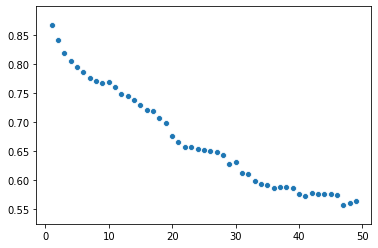

In [62]:
sb.scatterplot(range(1,50),acc_rate)

# Applying Random Forest Technique for Prediction

In [63]:
from sklearn.ensemble import RandomForestClassifier

In [64]:
rfc=RandomForestClassifier()

In [65]:
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [66]:
y_pred_rfc1=rfc.predict(x_test)

In [67]:
acc_score_rfc1=acc(y_test,y_pred_rfc1)
acc_score_rfc1

0.8817114093959731

In [68]:
from sklearn.model_selection import GridSearchCV
parameters = [{'n_estimators': [100,200,300,400,500,600,700,800,900,1000],'max_depth': [10,20,30,40,50],'min_samples_split': [50,70,90,100,200,300,400,500]}]
grid_search = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search = grid_search.fit(x_train,y_train)

In [69]:
grid_search.best_params_

{'max_depth': 20, 'min_samples_split': 50, 'n_estimators': 900}

In [70]:
rfc1=RandomForestClassifier(max_depth=20,min_samples_split=50,n_estimators=900)

In [71]:
rfc1.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, n_estimators=900,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [72]:
y_pred_rfc2=rfc1.predict(x_test)

In [73]:
acc_score_rfc2=acc(y_test,y_pred_rfc2)
acc_score_rfc2

0.8104026845637584